# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nadya Ruth Enina Purba
- **Email:** nadyapurba1801@gmail.com
- **ID Dicoding:** nadyapurba

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi penyewaan sepeda berdasarkan waktu pada hari kerja dan hari libur?

- Apakah ada perbedaan pola penyewaan sepeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data

- upload dataset
- tampilkan data yang ada di dataset

In [2]:
df = pd.read_csv("hour.csv", delimiter=",")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

- Penjelasan kolom dari data di atas
- instant: No urut dari setiap rekaman
- dtadey : tanggal
- season : musim (terdapat 4 musim yaitu semi,panas,gugur, dan musim dingin)
- yr : tahun (mulai dari tahun 2011-2012)
- mnth : bulan ( dari bukan 1-12 yaitu dari januari sampai dengan desember)
- hr : jam (0 - 23)
- holiday : apakah hari tersebut libur atau tidak
- keekday : hari dalam seminggu
- workingday : jika hari libur maka bernilai 1, jika tidak maka bernilai 0
- weathersit : siatuasi cuaca
- temp : suhu
- atemp : adalah kolom yang memberikan nilai suhu perasaan yang dinormalisasi dalam derajat Celsius.
- hum : kelembaban yang di normalisasi
- windspeed : kecepatan angin
- casual : jumlah pengguna tidak resmi
- registered : jumlah pengguna terdaftar
- cnt : jumlah pengguna total termasuk pengguna resmi ataupun tidak

- cek Missing Values

In [3]:
print("Missing Value:")
df.isna().sum()

Missing Value:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Cek apakah ada data yang duplicate

In [4]:
print("Total Duplicate : ", df.duplicated().sum())

Total Duplicate :  0


- Cek informasi dari dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Memeriksa nilai unik dari dari dataframe

In [6]:
check = [ 'yr', 'mnth', 'holiday', 'weekday','workingday','season', 'weathersit'] #Feature yang ingin di periksa
for col in check: #loop untuk seluruh feature pada check
    unique_val = df[col].unique()
    print(f'Unique values {col}:') # Menampilkan semua nilai unik untuk feature yang telah ditentukan
    print(unique_val)
    print()

Unique values yr:
[0 1]

Unique values mnth:
[ 1  2  3  4  5  6  7  8  9 10 11 12]

Unique values holiday:
[0 1]

Unique values weekday:
[6 0 1 2 3 4 5]

Unique values workingday:
[0 1]

Unique values season:
[1 2 3 4]

Unique values weathersit:
[1 2 3 4]



- Pengecekan outlier menggunakan bol plot

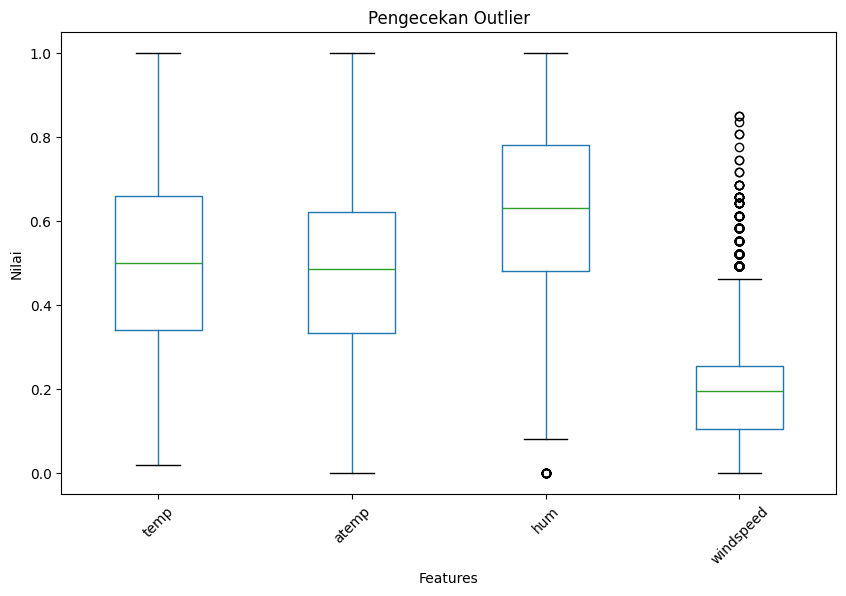

In [7]:
plt.figure(figsize=(10, 6))
df.boxplot(column=['temp', 'atemp', 'hum','windspeed'])
plt.title('Pengecekan Outlier')
plt.ylabel('Nilai')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

- mengecek outlier box plot dalam column " count"

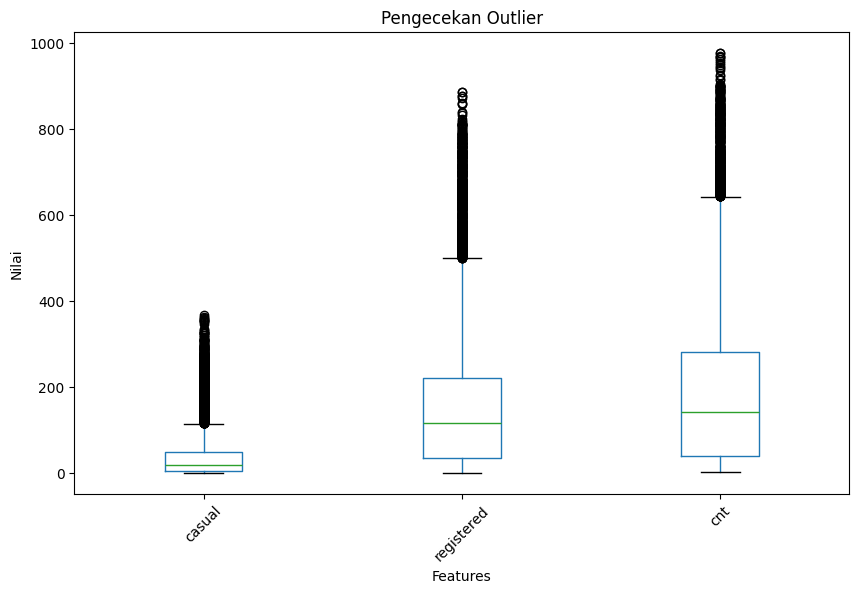

In [8]:
plt.figure(figsize=(10, 6))
df.boxplot(column=[ 'casual', 'registered', 'cnt'])
plt.title('Pengecekan Outlier')
plt.ylabel('Nilai')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

### Cleaning Data

-  menghapus baris-baris dari DataFrame df yang memiliki nilai windspeed yang di luar batas bawah dan atas yang ditentukan oleh metode IQR (Interquartile Range)

In [9]:
Q1 = (df['windspeed']).quantile(0.25)
Q3 = (df['windspeed']).quantile(0.75)
IQR = Q3 - Q1

max = Q3 + (1.5*IQR)
min = Q1 - (1.5*IQR)

con_low = df['windspeed'] < min
con_mor = df['windspeed'] > max

df.drop(df[con_low].index, inplace=True)

- penghapusan outlier pada kolom 'casual' dari DataFrame

In [10]:
Q1 = (df['casual']).quantile(0.25)
Q3 = (df['casual']).quantile(0.75)
IQR = Q3 - Q1

max = Q3 + (1.5*IQR)
min = Q1 - (1.5*IQR)

con_low = df['casual'] < min
con_mor = df['casual'] > max

df.drop(df[con_low].index, inplace=True)

- melakukan pemrosesan outlier pada kolom 'hum'

In [11]:
Q1 = (df['hum']).quantile(0.25)
Q3 = (df['hum']).quantile(0.75)
IQR = Q3 - Q1

max = Q3 + (1.5*IQR)
min = Q1 - (1.5*IQR)

con_low = df['hum'] < min
con_mor = df['hum'] > max

df.drop(df[con_low].index, inplace=True)

- melakukan pemrosesan outlier pada kolom 'registered' dari DataFrame

In [12]:
Q1 = (df['registered']).quantile(0.25)
Q3 = (df['registered']).quantile(0.75)
IQR = Q3 - Q1

max = Q3 + (1.5*IQR)
min = Q1 - (1.5*IQR)

con_low = df['registered'] < min
con_mor = df['registered'] > max

df.drop(df[con_low].index, inplace=True)

- melakukan pemrosesan outlier pada kolom 'cnt' (jumlah total pengguna sepeda) dari DataFrame

In [13]:
Q1 = (df['cnt']).quantile(0.25)
Q3 = (df['cnt']).quantile(0.75)
IQR = Q3 - Q1

max = Q3 + (1.5*IQR)
min = Q1 - (1.5*IQR)

con_low = df['cnt'] < min
con_mor = df['cnt'] > max

df.drop(df[con_low].index, inplace=True)

- informasi dari data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17357 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17357 non-null  int64  
 1   dteday      17357 non-null  object 
 2   season      17357 non-null  int64  
 3   yr          17357 non-null  int64  
 4   mnth        17357 non-null  int64  
 5   hr          17357 non-null  int64  
 6   holiday     17357 non-null  int64  
 7   weekday     17357 non-null  int64  
 8   workingday  17357 non-null  int64  
 9   weathersit  17357 non-null  int64  
 10  temp        17357 non-null  float64
 11  atemp       17357 non-null  float64
 12  hum         17357 non-null  float64
 13  windspeed   17357 non-null  float64
 14  casual      17357 non-null  int64  
 15  registered  17357 non-null  int64  
 16  cnt         17357 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.4+ MB


- Mengganti nilai tertentu dari kolom "yr"

In [15]:
change_val = {0 : 2011, 1 : 2012}
df['yr'].replace(change_val, inplace=True)
print('Recent unique value:')
print(df['yr'].unique())

Recent unique value:
[2011 2012]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13668\2932769469.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['yr'].replace(change_val, inplace=True)


- Mengganti nilai tertentu dari kolom "mnth"  pada dataframe

In [16]:
change_val = { 1 : 'Jan' , 2 : 'Feb' , 3 : 'Mar' , 4 : 'Apr' , 5 : 'May' , 6 : 'Jun' , 7 : 'Jul' , 8 : 'Aug', 9 : 'Sep' , 10 : 'Oct' , 11 : 'Nov' , 12 : 'Dec' }
df['mnth'].replace(change_val, inplace=True)
print('Recent unique value:')
print(df['mnth'].unique())

Recent unique value:
['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13668\2456540884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mnth'].replace(change_val, inplace=True)


- mengganti nilai pada hari libur atau bukan hari libur

In [17]:
change_val = {0 : "Not holiday", 1 : "Holiday"}
df['holiday'].replace(change_val, inplace=True)
print('Recent unique value :')
print(df['holiday'].unique())

Recent unique value :
['Not holiday' 'Holiday']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13668\3298198865.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['holiday'].replace(change_val, inplace=True)


- Mengganti nilai tertentu pada hari

In [18]:
change_val = {0 : 'Su', 1 : 'Mo',  2 : 'Tu',  3 : 'We',  4 : 'Th', 5 : 'Fr', 6 : 'Sa', }
df['weekday'].replace(change_val, inplace=True)
print('unique value sekarang :')
print(df['weekday'].unique())

unique value sekarang :
['Sa' 'Su' 'Mo' 'Tu' 'We' 'Th' 'Fr']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13668\216630127.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weekday'].replace(change_val, inplace=True)


- Mengganti nilai tertentu pada hari libur atau bukan hari libur

In [19]:
change_val = {0 : "Not Workday", 1 : "Workingday"}
df['workingday'].replace(change_val, inplace=True)
print('unique value sekarang :')
print(df['workingday'].unique())

unique value sekarang :
['Not Workday' 'Workingday']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13668\2498306247.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workingday'].replace(change_val, inplace=True)


- Mengganti nilai tertentu pada kolom cuaca

In [20]:
change_val = { 1 : 'Spring' , 2 : 'Summer' , 3 : 'Fall' , 4 : 'Winter' }
df['season'].replace(change_val, inplace=True)
print('unique value sekarang :')
print(df['season'].unique())

unique value sekarang :
['Spring' 'Summer' 'Fall' 'Winter']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13668\1425671391.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['season'].replace(change_val, inplace=True)


- Mengganti nilai tertentu pada kolom suhu

In [21]:
change_val = { 1 : 'Clear' , 2 : 'Cloudy' , 3 : 'Light Rain/Snow' , 4 : 'Heavy Rain/Snow' }
df['weathersit'].replace(change_val, inplace=True)
print('Recent unique value  :')
print(df['weathersit'].unique())

Recent unique value  :
['Clear' 'Cloudy' 'Light Rain/Snow' 'Heavy Rain/Snow']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13668\4041671136.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weathersit'].replace(change_val, inplace=True)


- informasi data pada dataframe

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17357 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17357 non-null  int64  
 1   dteday      17357 non-null  object 
 2   season      17357 non-null  object 
 3   yr          17357 non-null  int64  
 4   mnth        17357 non-null  object 
 5   hr          17357 non-null  int64  
 6   holiday     17357 non-null  object 
 7   weekday     17357 non-null  object 
 8   workingday  17357 non-null  object 
 9   weathersit  17357 non-null  object 
 10  temp        17357 non-null  float64
 11  atemp       17357 non-null  float64
 12  hum         17357 non-null  float64
 13  windspeed   17357 non-null  float64
 14  casual      17357 non-null  int64  
 15  registered  17357 non-null  int64  
 16  cnt         17357 non-null  int64  
dtypes: float64(4), int64(6), object(7)
memory usage: 2.4+ MB


- Mengganti nama dari dataframe supayamudah di baca

In [23]:
df.rename(columns={
    'dteday' : 'Date',
    'instant' : 'Instant',
    'season' : 'Season',
    'yr' : 'Year',
    'mnth' : 'Month',
    'hr' : 'Hour',
    'holiday' : 'Holiday',
    'weekday' : 'Weekday',
    'workingday' : 'Workingday',
    'weathersit' : 'Weather',
    'temp' : 'Temperature',
    'hum' : 'Humidity',
    'windspeed' : 'Windspeed',
    'registered' : 'Registered_user',
    'casual' : 'Casual_user',
    'cnt' : 'Total_rental'
}, inplace=True
)

- Konversi data dari kolom "date"

In [24]:
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17357 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Instant          17357 non-null  int64         
 1   Date             17357 non-null  datetime64[ns]
 2   Season           17357 non-null  object        
 3   Year             17357 non-null  int64         
 4   Month            17357 non-null  object        
 5   Hour             17357 non-null  int64         
 6   Holiday          17357 non-null  object        
 7   Weekday          17357 non-null  object        
 8   Workingday       17357 non-null  object        
 9   Weather          17357 non-null  object        
 10  Temperature      17357 non-null  float64       
 11  atemp            17357 non-null  float64       
 12  Humidity         17357 non-null  float64       
 13  Windspeed        17357 non-null  float64       
 14  Casual_user      17357 non-null  int64     

- Simpan dataframe dalam file.csv

In [25]:
df.to_csv('hour_cleaned.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

- Mencari beberapa hubungan /korelasi antar data

In [26]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 3))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Heatmap Korelasi antar Fitur')
plt.show()

ValueError: could not convert string to float: 'Jan'

<Figure size 1000x300 with 0 Axes>

- Mengelompokkan data dalam dataframe berdasarkan musim

In [ ]:
result = df.groupby(by="Season").agg({
    "Registered_user": "sum",
    "Casual_user": "sum",
    "Total_rental":  "sum"
})

result_sorted = result.sort_values(by='Total_rental', ascending=False)

print(result_sorted)

        Registered_user  Casual_user  Total_rental
Season                                            
Fall             835038       226091       1061129
Summer           715067       203522        918589
Winter           711831       129782        841613
Spring           410149        60576        470725


- Mengelompokkan data dalam dataframe berdasarkan kolom "weather"

In [ ]:
df.groupby(by="Weather").agg({
    "Registered_user": "sum",
    "Casual_user": "sum",
    "Total_rental":  "sum"
}).sort_values(by="Total_rental", ascending=False)

,Registered_user,Casual_user,Total_rental
Weather,,,
Clear,1875428,462745,2338173
Cloudy,661332,134475,795807
Light Rain/Snow,135110,22743,157853
Heavy Rain/Snow,215,8,223


- Mengelompokkan data dalam dataframe berdasarkan kolom "weather" dan "season"

In [ ]:
df.groupby(by=["Weather", "Season"]).agg({
    "Total_rental":  "sum"
}).sort_values(by="Total_rental", ascending=False)

Total_rental
Weather         Season              
Clear           Fall          801941
                Summer        664463
                Winter        546491
                Spring        325278
Cloudy          Winter        251452
                Fall          212932
                Summer        207363
                Spring        124060
Light Rain/Snow Summer         46763
                Fall           46256
                Winter         43670
                Spring         21164
Heavy Rain/Snow Spring           223

Mengelompokkan data dalam dataframe berdasarkan kolom "keekday"

In [ ]:
df.groupby(by='Weekday').agg({
    'Total_rental':['max',
                    'min',
                    'mean',
                    'sum']
})

Total_rental                        
                 max min        mean     sum
Weekday                                     
Fr               957   1  196.135907  487790
Mo               968   1  183.744655  455503
Sa               783   1  190.209793  477807
Su               776   1  177.468825  444027
Th               976   1  197.946917  484772
Tu               970   1  191.238891  469109
We               977   1  191.130505  473048

- Mengelompokkan data dalam dataframe berdasarkan kolom "workingday"

In [ ]:
df.groupby(by="Workingday").agg({
    "Registered_user": "sum",
    "Casual_user": "sum",
    "Total_rental":  "sum"
}).sort_values(by="Total_rental", ascending=False)

,Registered_user,Casual_user,Total_rental
Workingday,,,
Workingday,1988548,303239,2291787
Not Workday,683537,316732,1000269


- Mengelompokkan data dalam dataframe berdasarkan kolom "holidayr"

In [ ]:
df.groupby(by="Holiday").agg({
    "Registered_user": "sum",
    "Casual_user": "sum",
    "Total_rental":  "sum"
}).sort_values(by="Total_rental", ascending=False)

,Registered_user,Casual_user,Total_rental
Holiday,,,
Not holiday,2616009,597612,3213621
Holiday,56076,22359,78435


- Mengelompokkan data dalam dataframe berdasarkan kolom "hour"

In [ ]:
df.groupby(by="Hour").agg({
    "Registered_user": "sum",
    "Casual_user": "sum",
    "Total_rental":  "sum"
}).sort_values(by="Total_rental", ascending=False)


,Registered_user,Casual_user,Total_rental
Hour,,,
17,282531,54218,336749
18,265196,44494,309690
8,245197,15760,260957
16,173894,53833,227727
19,191233,35500,226733
13,132195,52712,184907
12,134666,49714,184380
15,128532,54603,183135
14,120551,55089,175640


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi penyewaan sepeda berdasarkan waktu pada hari kerja dan hari libur?

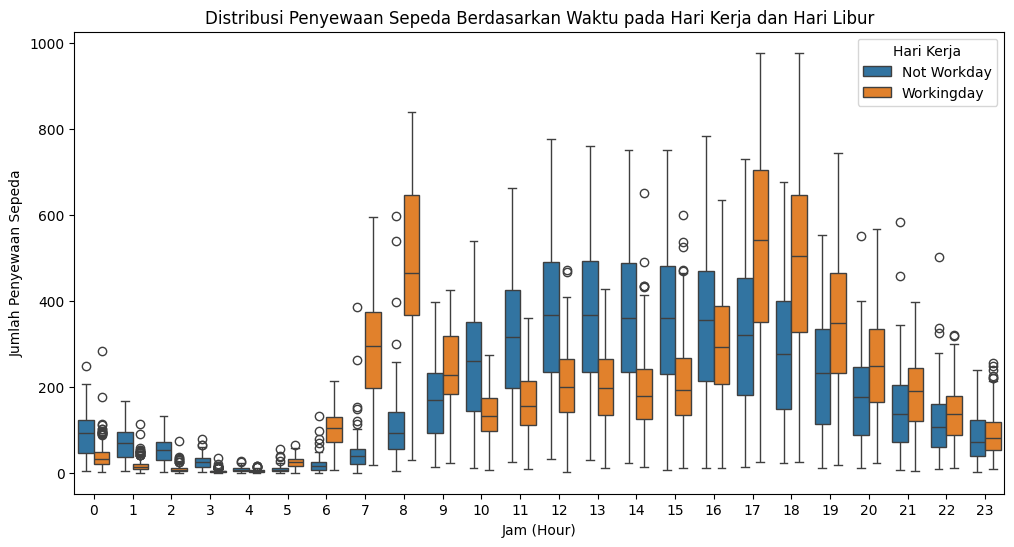

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='Hour', y='Total_rental', hue='Workingday', data=df)

plt.title('Distribusi Penyewaan Sepeda Berdasarkan Waktu pada Hari Kerja dan Hari Libur')

plt.xlabel('Jam (Hour)')

plt.ylabel('Jumlah Penyewaan Sepeda')

plt.legend(title='Hari Kerja')

plt.show()

### Pertanyaan 2: Apakah ada perbedaan pola penyewaan sepeda antara hari kerja dan hari libur?

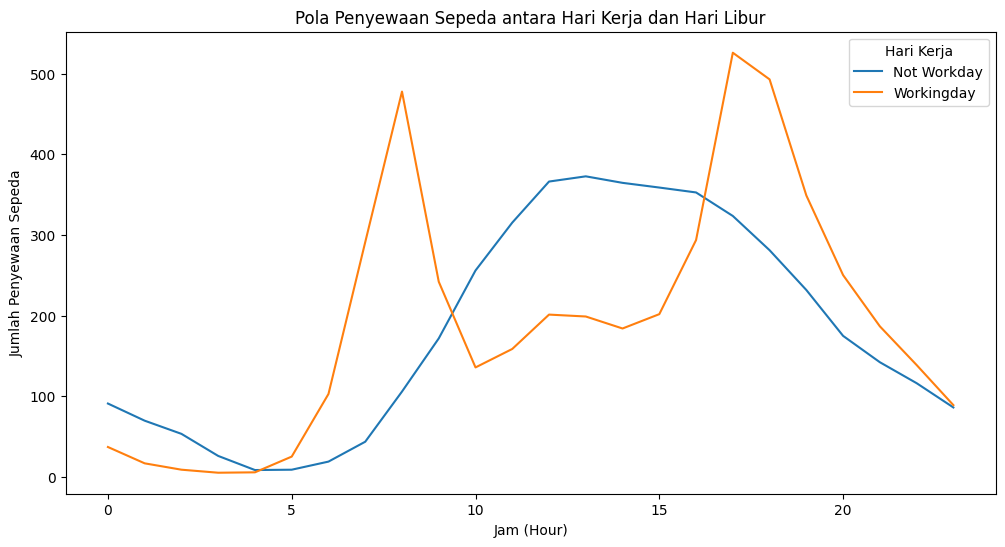

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='Hour', y='Total_rental', hue='Workingday', data=df, ci=None)

plt.title('Pola Penyewaan Sepeda antara Hari Kerja dan Hari Libur')

plt.xlabel('Jam (Hour)')

plt.ylabel('Jumlah Penyewaan Sepeda')

plt.legend(title='Hari Kerja')

plt.show()

## Conclusion

- Penyewaan sepeda pada hari kerja (working day) mengalami fluktuasi tajam pada jam berangkat dan jam pulang kerja . Sedangkan pada hari libur, fluktuasi penyewaan sepeda terjadi pada tengah hari sampai sore.
- Pada hari kerja, penyewaan sepeda mengalami peningkatan banyak pada jam 5 sampai 9 pagi dan pada hari libur, penyewaan mengalami peningkatan pada jam 10 sampai jam 3 sore.